In [1]:
import pandas as pd
import numpy as np
import preprocess
import group_calc


### Data preprocess pipline
1. download ohlcv data of s&p500 component stocks from yfinance
2. delete stocks that are empty or have too much na
3. Change the format of the original table and combine all the stock data into the corresponding cross-sectional data table

In [2]:
import os
csv_list = [f for f in os.listdir("data") if f.endswith(".csv")]
print(f"Number of stocks we use for factor backtest is: {len(csv_list)}")

Number of stocks we use for factor backtest is: 498


In [3]:
factor_df=pd.read_csv('./data2/momentum_df.csv')
ret_df=pd.read_csv('./data2/ret_df.csv')

### Data preprocess

In [4]:
factor_df = preprocess.del_outlier(factor_df, factor_name='momentum', n=3)
factor_df = preprocess.zscore_standardize(factor_df, factor_name='momentum')


In [5]:
grouped_df = group_calc.get_stock_group(factor_df, factor_name='momentum', n_groups=5)


In [6]:
group_ret_df = group_calc.get_group_ret(factor_df, ret_df, factor_name='momentum', n_groups=5)


### Group Backtest Result

In [7]:
bt_result = group_calc.get_group_ret_backtest(group_ret_df, rf=0.02, period='DAILY')
print(bt_result)

                          Group0     Group1     Group2     Group3      Group4  \
annual return(%)     -121.355727 -31.726942  13.572177  54.133139  133.701814   
annual volatility(%)   29.114261  22.999694  21.323714  20.484328   21.560214   
sharpe ratio           -4.236952  -1.466408   0.542690   2.545026    6.108558   
max drawdown(%)        99.942434  88.304776  39.990300  32.462915   16.552486   

                             H-L  
annual return(%)      255.057541  
annual volatility(%)   22.775893  
sharpe ratio           11.110763  
max drawdown(%)        22.611497  


### Net value graph

C:\Users\yuxig\AppData\Local\Temp\ipykernel_39140\757279993.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_group.show()
C:\Users\yuxig\AppData\Local\Temp\ipykernel_39140\757279993.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_hl.show()


                          Group0     Group1     Group2     Group3      Group4  \
annual return(%)     -121.355727 -31.726942  13.572177  54.133139  133.701814   
annual volatility(%)   29.114261  22.999694  21.323714  20.484328   21.560214   
sharpe ratio           -4.168257  -1.379451   0.636483   2.642661    6.201321   
max drawdown(%)        99.942434  88.304776  39.990300  32.462915   16.552486   

                             H-L  
annual return(%)      255.057541  
annual volatility(%)   22.775893  
sharpe ratio           11.198575  
max drawdown(%)        22.611497  


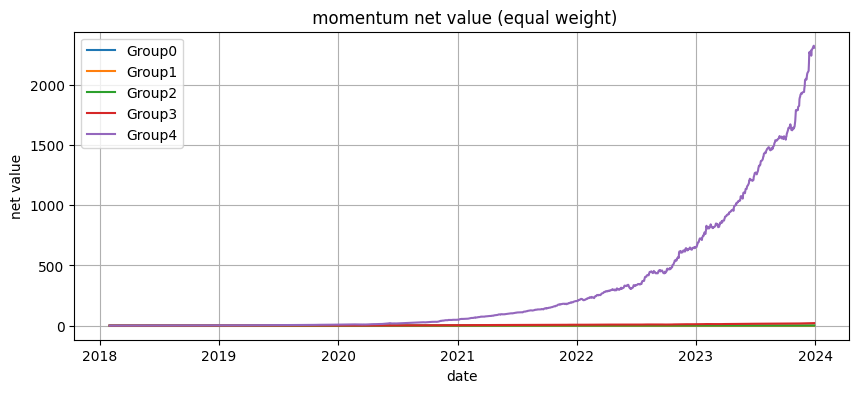

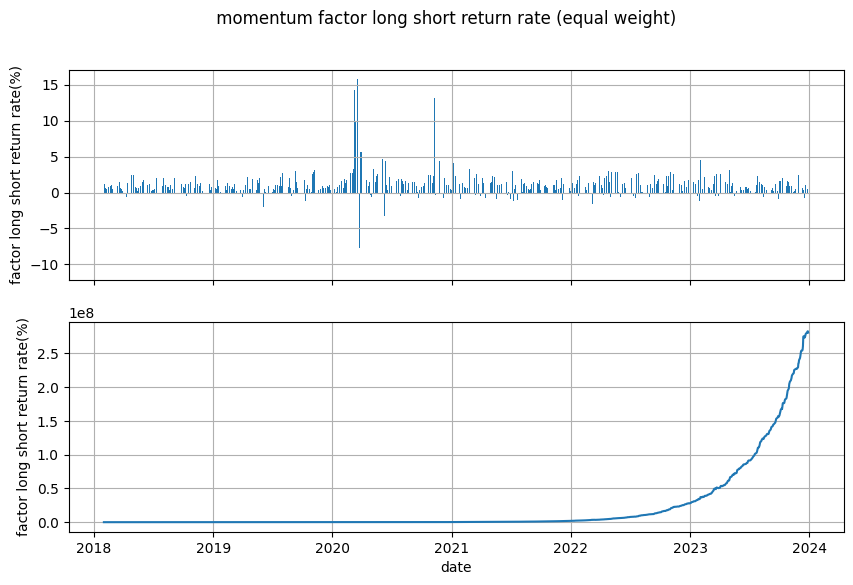

In [8]:
bt_result, fig_group, fig_hl = group_calc.analysis_group_ret(factor_df, ret_df, 'momentum', n_groups=5)
fig_group.show()
fig_hl.show()
print(bt_result)

### This single factor backtest result may have some overfitting.
 Here are some reasons:
1. Due to lack of data, market capitalization neutralization and industry neutrualization haven't been carried out. Results from different groups may look inflated when the top and bottom groups are highly volatile or contain extreme performers .
2. High-momentum groups tend to be dominated by extreme winners, while low-momentum groups are often filled with poor-quality stocks. Stocks that have experienced continuous declines, are near delisting, or have low liquidity frequently end up in Group 0. To address this, it's important to incorporate cross-sectional regression and IC (Information Coefficient) testing in subsequent analysis.


                 Value
IC Mean       0.190056
IC Std        0.211301
IC IR         0.899454
IC > 0 Ratio  0.831430


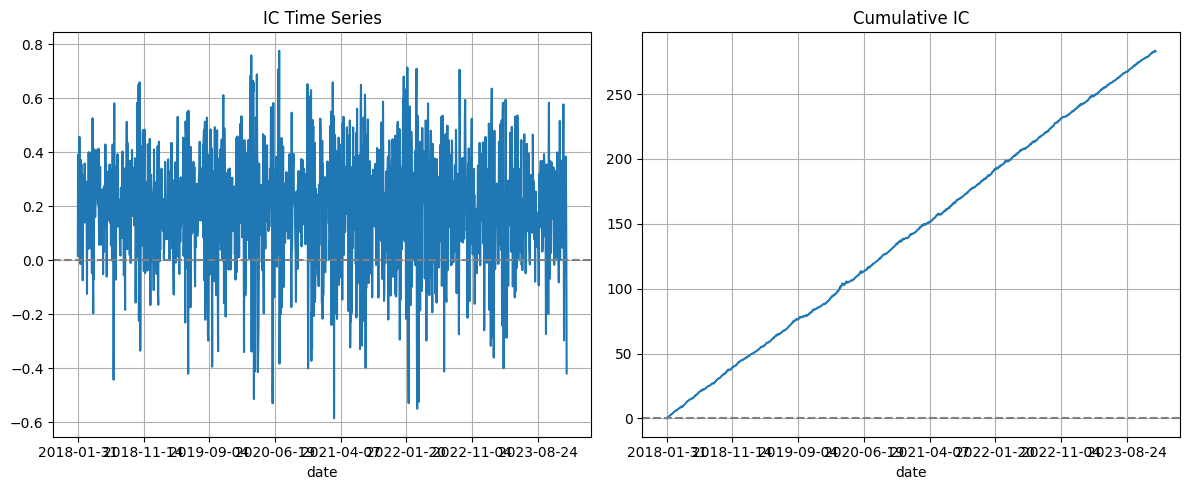

In [9]:
merged_df = group_calc.prepare_ic_data(factor_df, ret_df, factor_name='momentum')
ic_series = group_calc.calc_ic_series(merged_df, factor_name='momentum')
print(group_calc.summarize_ic(ic_series))
group_calc.plot_ic_series(ic_series)


### IC analysis
### This IC summary suggests this factor has strong and consistent predictive power:

IC Mean = 0.1901:
An average IC above 0.1 is generally considered to indicate a useful factor. It means the factor has a strong rank correlation with future returns.

IC Std = 0.2113:
The standard deviation of IC is moderate. Some fluctuation is expected, and IC isn't overly volatile.

IC IR = 0.8995:
The IC Information Ratio (IC/Std) close to 1 suggests a high signal-to-noise ratio—this factor consistently adds value.

IC > 0 Ratio = 0.8314:
About 83% of the time, this factor has a positive IC. This high hit ratio further confirms its stability.